## 一元线性回归

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")
# 导入警告模块并设置忽略所有警告，避免代码运行时非关键警告信息干扰输出显示

In [4]:
import pandas as pd
df = pd.read_csv('D:\\LLQ downloads\\ml-master (1)\\ml-master\\datasets\\housing\\housing.csv')

In [5]:
california = df

In [6]:
# print(california.DESCR)
# DESCR是scikit-learn内置数据集特有的描述属性，用于存储数据集背景、特征说明等信息
# 而通过pd.read_csv()读取的普通CSV文件仅生成DataFrame，无DESER属性

In [7]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


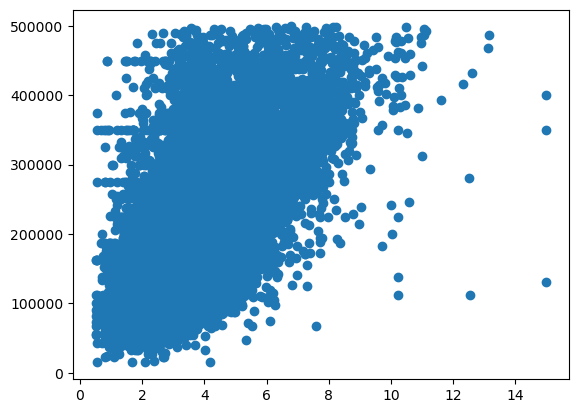

In [8]:
x = california['median_income']
y = california['median_house_value']

x = x[y<500000]
y = y[y<500000]

plt.scatter(x,y)
plt.show()

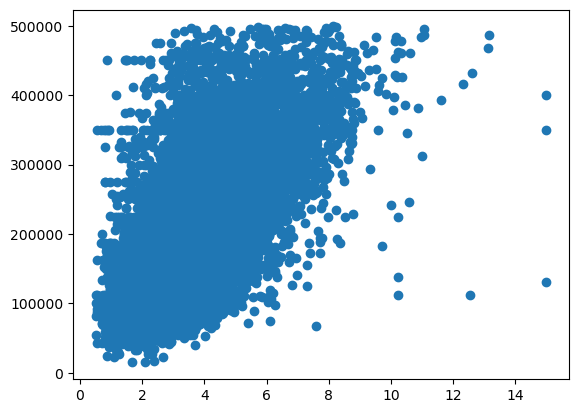

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 666)

plt.scatter(x_train,y_train)
plt.show()

## 一元线性回归公式实现

In [11]:
def fit(x,y):
    a_up = np.sum((x-np.mean(x))*(y-np.mean(y)))
    a_bottom = np.sum((x-np.mean(x))**2)
    a = a_up / a_bottom
    b = np.mean(y) - a*np.mean(x)
    return a,b

In [12]:
a,b = fit(x_train, y_train)
a,b

(39756.631744258506, 46582.9262029955)

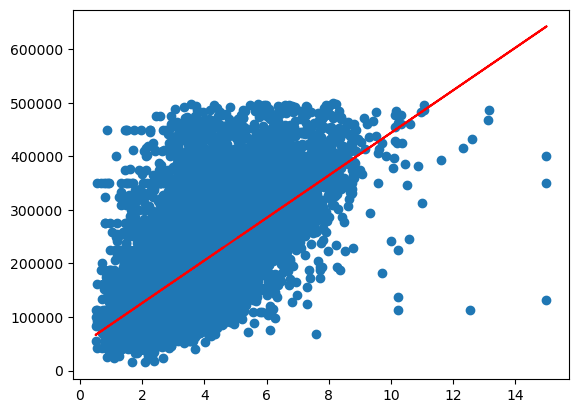

In [13]:
plt.scatter(x_train,y_train)
plt.plot(x_train,a*x_train+b,c='r')
plt.show()

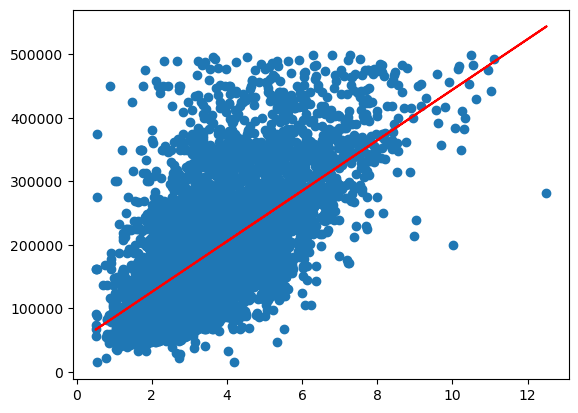

In [14]:
plt.scatter(x_test,y_test)
plt.plot(x_test,a*x_test+b,c='r')
plt.show()

## sklearn实现一元线性回归

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

x_train = x_train.values 
x_test = x_test.values 
lin_reg.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

In [17]:
y_predict = lin_reg.predict(x_test.reshape(-1,1))

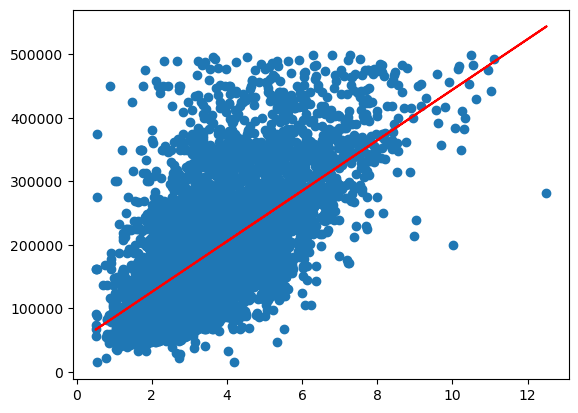

In [18]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict,c='r')
plt.show()